In [47]:
import oommfc as oc
import discretisedfield as df
import micromagneticmodel as mm
import random
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

In [270]:
# Create a line of spins
p1 = (0,-10e-9,0)
p2 = (1e-9,10e-9,1e-9)
cell = (1e-9,1e-9,1e-9)
region = df.Region(p1=p1,p2=p2)
mesh = df.Mesh(region=region,cell=cell)

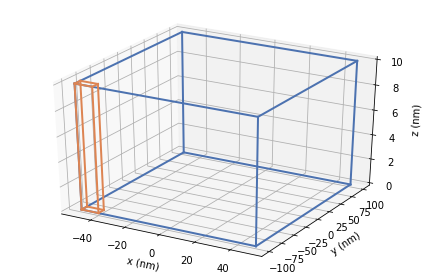

In [542]:
# create plane of spins

p1 = (-5e-8,-10e-8,0)
p2 = (5e-8,10e-8,1e-8)
cell = (1e-8,1e-8,1e-8)
region = df.Region(p1=p1,p2=p2)
mesh = df.Mesh(region=region,cell=cell)
mesh.mpl()

In [343]:
# Zeeman
H = (0,0,1e6)
system = mm.System(name='zeeman_constant_H')
system.energy = mm.Zeeman(H=H)

In [523]:
# Exchange
A = 1e-12#1e-12  # exchange energy constant (J/m)
system = mm.System(name='exchange_constant_A')
system.energy = mm.Exchange(A=A)

In [356]:
# anisotropy
K = 1e3
u = (1, 1, 1)
system = mm.System(name='Uniaxial_Anisotropy')
system.energy = mm.UniaxialAnisotropy(K=K, u=u)


In [412]:
# DM
system = mm.System(name='DM')
system.energy = mm.DMI(D=1e-3, crystalclass='Cnv')

In [543]:
# demag
system = mm.System(name='demag')
system.energy = mm.Demag() +mm.Exchange(A=A)

In [426]:
system.energy

Demag()

In [544]:
# Load magnetisation into system
Ms = 8e5
random.seed(9001)
def m_fun(pos):
    return [2*random.random()-1 for i in range(3)]

system.m = df.Field(mesh,dim=3, value=m_fun, norm=Ms)

In [340]:

def extract_data(ms):
    M = []

    for i in range(len(ms[0])):
        M.append(ms[0][i][0])

    mx = np.take(M,0,axis=1)
    my = np.take(M,1,axis=1)
    mz = np.take(M,2,axis=1)
    xs = np.arange(20)
    ys = np.zeros_like(xs)
    zs = np.zeros_like(xs)
    
    return mx,my,mz,xs,ys,zs

mx,my,mz,xs,ys,zs = extract_data(ms)

In [395]:

def plot_3D(ms, elev = 0, azim = 60):
    mx,my,mz,xs,ys,zs = extract_data(ms)
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca(projection='3d')
    q = ax.quiver(xs,ys,zs,mx,my,mz, length = 4*10e-9, linewidths=2,arrow_length_ratio=.5,color='Blue')#cmap='RdBu')
    #q.set_array(mx)
    ax.scatter(xs,ys,zs, color = 'black')
    ax.view_init(elev=elev, azim=azim)

    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    # Now set color to white (or whatever is "invisible")
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('w')

    # Bonus: To get rid of the grid as well:
    ax.grid(False)
    ax.set_zlabel('z', fontsize=20)
    plt.xlabel('x', fontsize=20)
    plt.ylabel('y', fontsize=20)

    # remove labels
    plt.xticks([])
    plt.yticks([])
    ax.zaxis.set_ticks([])

    # remove all axes
    #plt.axis('off')

    plt.plot([0,20],[0,0],'k-')
    
    

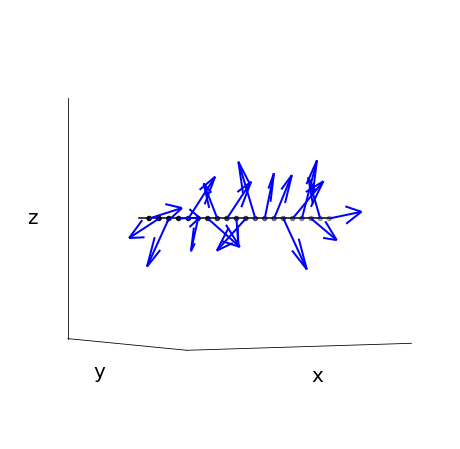

In [428]:
ms = system.m.array
plot_3D(ms, elev=0, azim=60)

In [545]:
# run minimization

md = oc.MinDriver()
md.drive(system)

Running OOMMF (ExeOOMMFRunner) [2020/06/10 17:14]... (1.6 s)


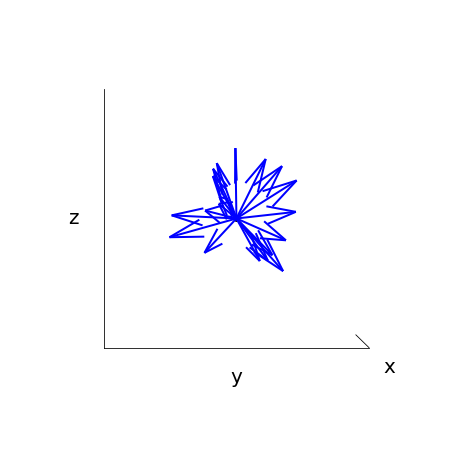

In [519]:
# plot minimised

ms = system.m.array
plot_3D(ms,elev=0,azim=0)

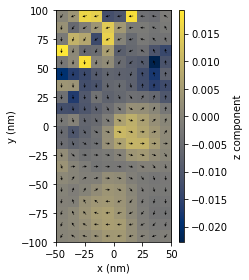

In [555]:
system.m.plane('z').mpl()


In [382]:
system.m.k3d_vectors()

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, background_color=16777215, camera=[2, -3, 0.2, 0.0, 0…

Output()

In [500]:
np.shape(ms)

(10, 20, 1, 3)

In [558]:
ms = system.m.array

xs,ys,zs,mx,my,mz = [],[],[],[],[],[]
for i in range(10):
    for j in range(20):
        xs.append(i)
        ys.append(j)
        zs.append(0)
        mx.append(ms[i][j][0][0])
        my.append(ms[i][j][0][1])
        mz.append(ms[i][j][0][2])

(-10.0, 10.0, -0.9, 18.9)

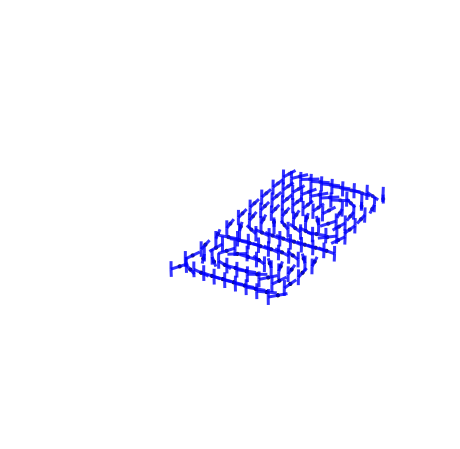

In [575]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
s = 2
ax.quiver(xs[::s],ys[::s],zs[::s],mx[::s],my[::s],np.array(mz[::s]), length = 2*10e-7, linewidths=3,arrow_length_ratio=.01,alpha=.8,color='Blue',pivot='middle')
#q.set_array(mz)
ax.scatter(xs[::s],ys[::s],zs[::s],color='k',s=10)

#ax.view_init(elev=80, azim=0)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

# Bonus: To get rid of the grid as well:
ax.grid(False)
ax.set_zlabel('z', fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)

# remove labels
plt.xticks([])
plt.yticks([])
ax.zaxis.set_ticks([])

plt.xlim([-10,10])

plt.axis('off')

In [556]:
ms

array([[[[ 8.25154067e+04,  7.95733126e+05, -1.27479156e-02]],

        [[ 6.56255332e+04,  7.97303762e+05, -1.24036311e-02]],

        [[ 4.95312355e+04,  7.98465188e+05, -3.85545905e-03]],

        [[ 3.64669429e+04,  7.99168419e+05, -6.29076611e-03]],

        [[ 2.63546385e+04,  7.99565778e+05, -2.76200745e-03]],

        [[ 1.86634758e+04,  7.99782267e+05, -8.09211378e-04]],

        [[ 1.28151615e+04,  7.99897351e+05, -4.57777922e-03]],

        [[ 8.28919969e+03,  7.99957055e+05, -4.26093104e-03]],

        [[ 4.64165213e+03,  7.99986534e+05, -9.94488357e-03]],

        [[ 1.49338783e+03,  7.99998606e+05, -1.12590773e-02]],

        [[-1.49317135e+03,  7.99998607e+05, -2.58971539e-03]],

        [[-4.64143946e+03,  7.99986536e+05, -1.98403727e-03]],

        [[-8.28898758e+03,  7.99957057e+05, -6.60945325e-03]],

        [[-1.28149667e+04,  7.99897354e+05, -1.13793538e-02]],

        [[-1.86632959e+04,  7.99782271e+05, -4.94667737e-04]],

        [[-2.63544615e+04,  7.99565784e+